In [1]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh_TGV1')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import Optics
from HHG import ActiveGrating
import Graph

Grating = Optics.Grating()

In [81]:
IR = Optics.Beam(w0=50e-6, lam=800e-9)

duration = 50e-15
t_axis = np.linspace(-5*20e-15, 5*20e-15, 5000)

def envelope(t, dur):
    return np.exp(-t**2/dur**2) * np.exp(1j*IR.omega*t)*1j

E = envelope(t_axis, duration)

E_sp, w_axis = Grating.Disperse2(E, t_axis)

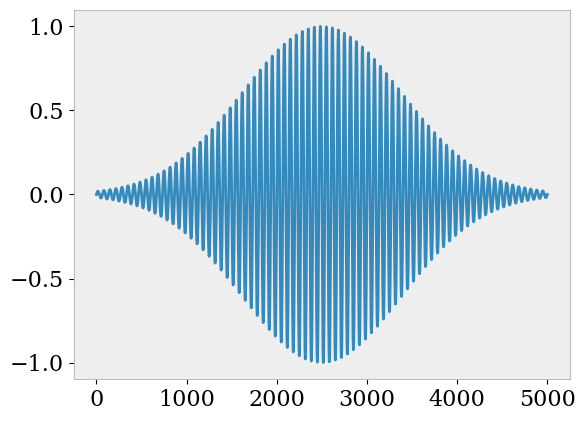

In [82]:
plt.plot(np.real(E))

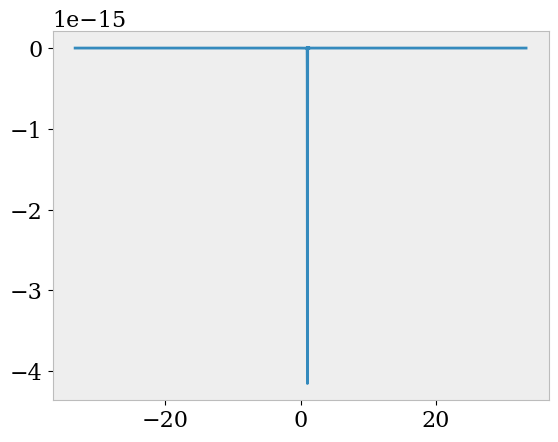

In [83]:
plt.plot(w_axis/IR.omega, E_sp)

In [84]:
qeff = 3.5
q = 25

E_AG = np.abs(E)**qeff * np.exp(1j*np.angle(E)*q)
E_AG_sp, w_axis = Grating.Disperse2(E_AG, t_axis)

E_AG2 = np.abs(np.real(E))**qeff * np.exp(1j*np.angle(E)*q)
E_AG2_sp, w_axis = Grating.Disperse2(E_AG2, t_axis)

(0.0, 50.0)

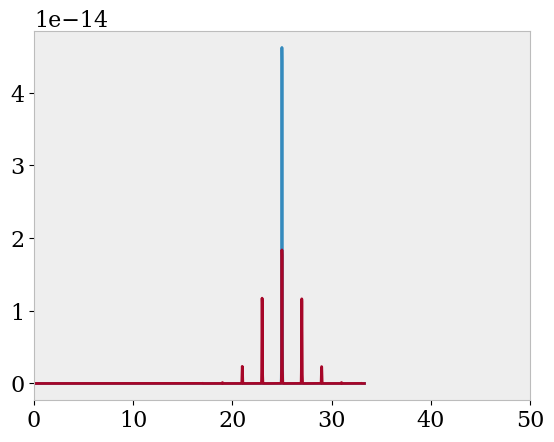

In [85]:
plt.plot(w_axis/IR.omega, np.abs(E_AG_sp))
plt.plot(w_axis/IR.omega, np.abs(E_AG2_sp))
plt.xlim(0, 50)

In [86]:
qeff = 3.5

phase = 0
for q in np.linspace(9, 27, 500):
    phase += np.exp(1j*np.angle(E)*q)

E_AG = np.abs(E)**qeff * phase
E_AG_sp, w_axis = Grating.Disperse2(E_AG, t_axis)

E_AG2 = np.sign(np.real(E)) * np.abs(np.real(E))**qeff * phase
E_AG2_sp, w_axis = Grating.Disperse2(E_AG2, t_axis)

c:\Users\tg263331\Anaconda3\envs\test_env\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(2000.0, 3000.0)

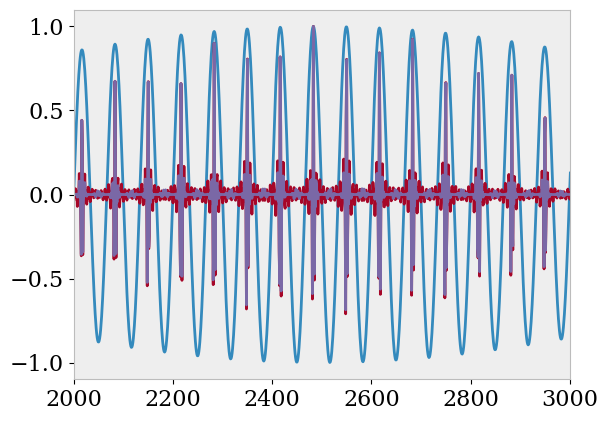

In [92]:
plt.plot(np.real(E))
plt.plot(E_AG/np.max(E_AG))
plt.plot(E_AG2/np.max(E_AG2))
plt.xlim(2000, 3000)

(9.0, 27.0)

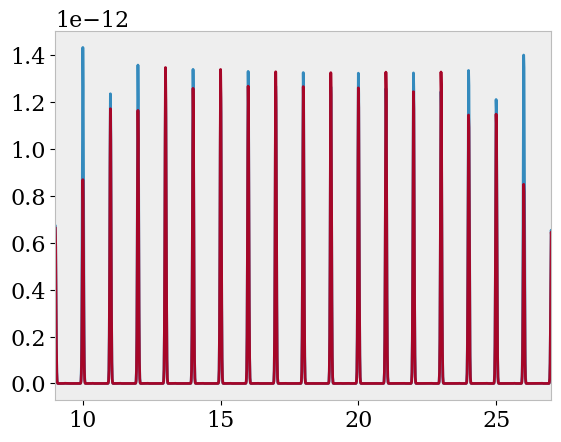

In [88]:
plt.plot(w_axis/IR.omega, np.abs(E_AG_sp))
plt.plot(w_axis/IR.omega, np.abs(E_AG2_sp))
plt.xlim(9, 27)